### 1. Import Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

import warnings
warnings.filterwarnings('ignore')

### 2 . Import Data

In [2]:
startups=pd.read_csv("50_Startups.csv")
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### 3. EDA

In [3]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
# datatype conversion
startups['State']=startups['State'].astype('category')
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   R&D Spend        50 non-null     float64 
 1   Administration   50 non-null     float64 
 2   Marketing Spend  50 non-null     float64 
 3   State            50 non-null     category
 4   Profit           50 non-null     float64 
dtypes: category(1), float64(4)
memory usage: 1.9 KB


In [5]:
startups1=startups.rename({'R&D Spend':'RDSpend','Administration':'Admin','Marketing Spend':'Mspend'},axis=1)
startups1.head()

,RDSpend,Admin,Mspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
startups1[startups1.duplicated()]

,RDSpend,Admin,Mspend,State,Profit


In [7]:
startups1.describe()

,RDSpend,Admin,Mspend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Assumptions Check

##### Normality Check

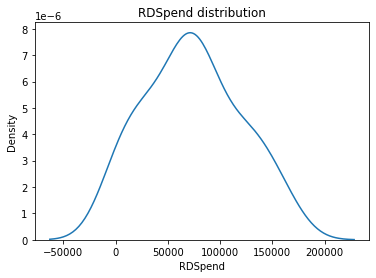

In [8]:
# We need to check whether RDSpend,Admin,Mspend all these following normal distribution or not.
# Since all these datas are continuous data we can go with distplot.
sns.distplot(a=startups1['RDSpend'],hist=False)
plt.title('RDSpend distribution')
plt.show()

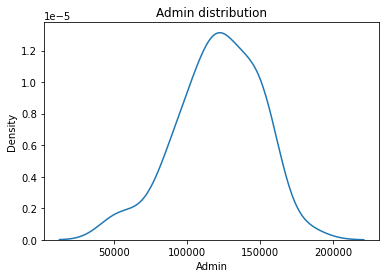

In [9]:
sns.distplot(a=startups1['Admin'],hist=False)
plt.title('Admin distribution')
plt.show()

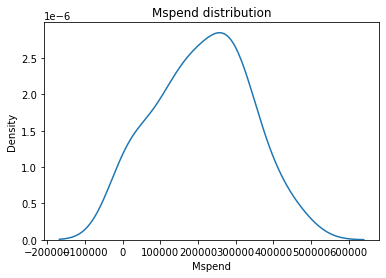

In [10]:
sns.distplot(a=startups1['Mspend'],hist=False)
plt.title('Mspend distribution')
plt.show()

#### Linearity Test

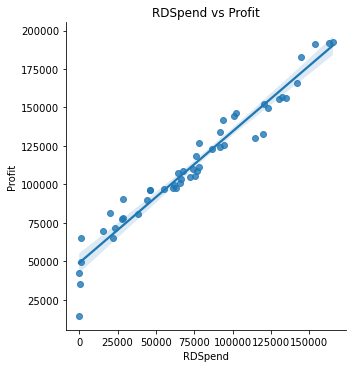

In [11]:
sns.lmplot(x='RDSpend',y='Profit',data=startups1)
plt.title('RDSpend vs Profit')
plt.show()

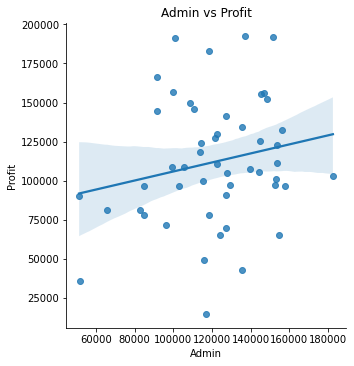

In [12]:
sns.lmplot(x='Admin',y='Profit',data=startups1)
plt.title('Admin vs Profit')
plt.show()

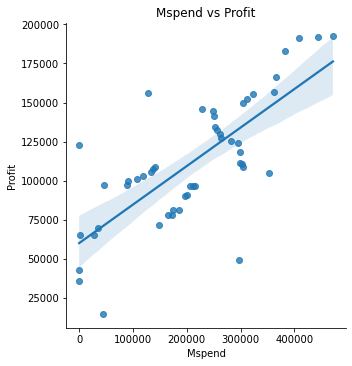

In [13]:
sns.lmplot(x='Mspend',y='Profit',data=startups1)
plt.title('Mspend vs Profit')
plt.show()

### Multicollinearity Test

In [14]:
# This can be checked by any of the following two techniques:
# 1. Correlation Matrix
# 2. VIF: Variance Inflation Factor

In [15]:
# 1. Correlation Matrix

# Gives the relationship between a single variable with another variable

In [16]:
corr_coeff=startups1.corr()
corr_coeff

,RDSpend,Admin,Mspend,Profit
RDSpend,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Mspend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


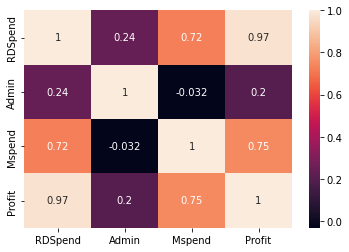

In [17]:
sns.heatmap(data=corr_coeff,annot=True)
plt.show()

In [18]:
#  Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables.

r_sqr_rds=smf.ols("RDSpend~Mspend+Admin",data=startups1).fit().rsquared
vif_rds=1/(1-r_sqr_rds)

r_sqr_ms=smf.ols("Mspend~RDSpend+Admin",data=startups1).fit().rsquared
vif_ms=1/(1-r_sqr_ms)

r_sqr_adm=smf.ols("Admin~Mspend+RDSpend",data=startups1).fit().rsquared
vif_adm=1/(1-r_sqr_adm)


d1={'Variables':['RDSpend','Admin','Mspend'],'Vif':[vif_rds,vif_ms,vif_adm]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDSpend,2.468903
1,Admin,2.326773
2,Mspend,1.175091


### 4. Model Building

In [19]:
smf.ols("Profit~RDSpend+Mspend+Admin",data=startups1)

In [20]:
model=smf.ols("Profit~RDSpend+Mspend+Admin",data=startups1).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           4.53e-30
Time:                        22:05:53   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDSpend        0.8057      0.045     17.846      0.000       0.715       0.897
Mspend         0.0272      0.016      1.655      0.105      -0.006       0.060
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# Finding Coefficient parameters
model.params

Intercept    50122.192990
RDSpend          0.805715
Mspend           0.027228
Admin           -0.026816
dtype: float64

In [23]:
# Finding t values and pvalues
model.tvalues, model.pvalues

(Intercept     7.626218
 RDSpend      17.846374
 Mspend        1.655077
 Admin        -0.525507
 dtype: float64,
 Intercept    1.057379e-09
 RDSpend      2.634968e-22
 Mspend       1.047168e-01
 Admin        6.017551e-01
 dtype: float64)

In [24]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

### Model Validation

#### Residual Analysis

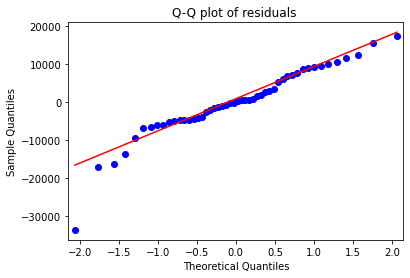

In [25]:
sm.qqplot(model.resid,line='q')
plt.title("Q-Q plot of residuals ")
plt.show()

In [26]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

### Checking Homoscadastidity

In [27]:
def standard_values(vals): return (vals-vals.mean())/vals.std()

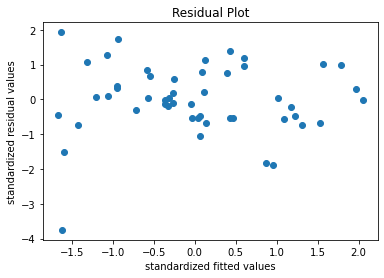

In [28]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

#### Residual Regression Plot

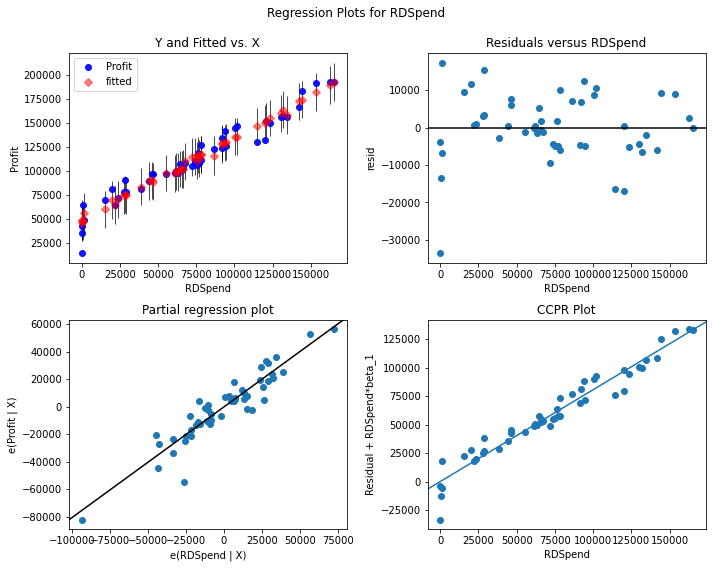

In [29]:
fig=plt.figure(figsize=(10,8))
sm.graphics.plot_regress_exog(model,'RDSpend',fig=fig)
plt.show()

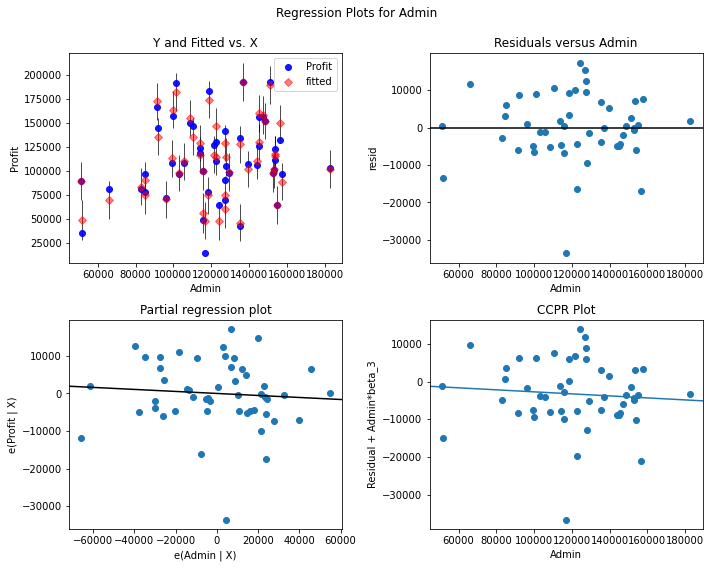

In [30]:
fig=plt.figure(figsize=(10,8))
sm.graphics.plot_regress_exog(model,'Admin',fig=fig)
plt.show()

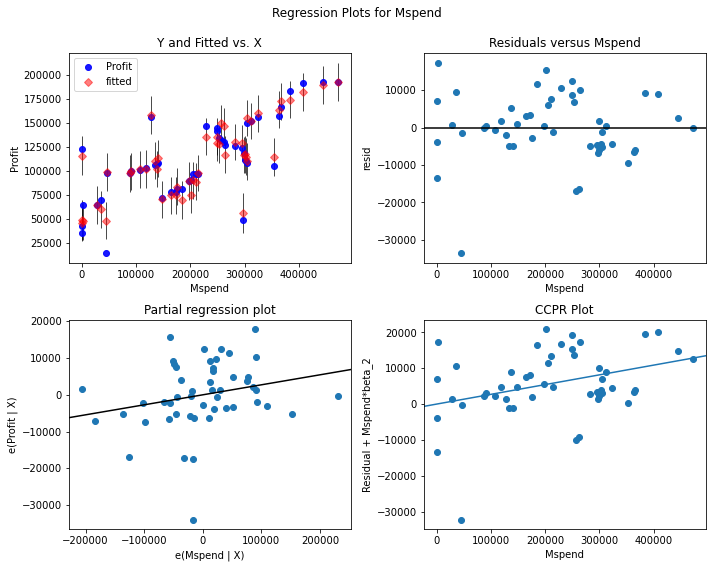

In [31]:
fig=plt.figure(figsize=(10,8))
sm.graphics.plot_regress_exog(model,'Mspend',fig=fig)
plt.show()

### find the influential outliers
#### Cooks' Distance

In [32]:
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

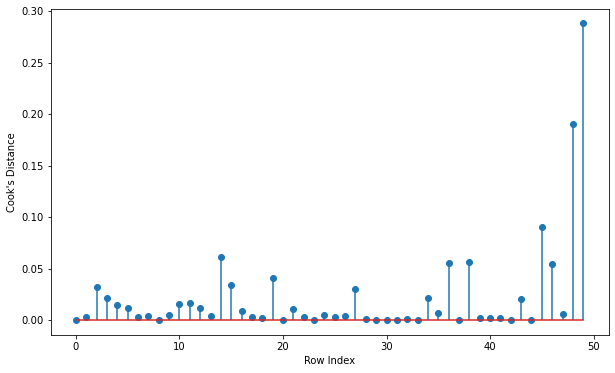

In [33]:
# plotting the influencers using stem plot

fig=plt.figure(figsize=(10,6))
plt.stem(np.arange(len(startups1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel("Cook's Distance")
plt.show()

In [34]:
# Index and value of influencer where c>0.5
np.argmax(c),np.max(c)

(49, 0.28808229275432734)

#### Leverage Values

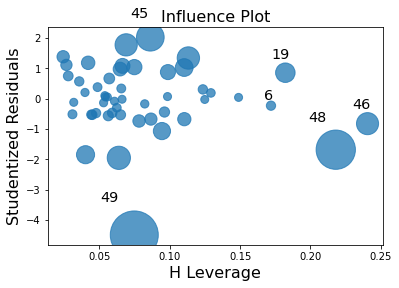

In [35]:
influence_plot(model)
plt.show()

In [36]:
#Leverage cutoff value= 3*(k+1)/n ; k = no of features & n = no of observations. 

In [37]:
k=startups1.shape[1]
n=startups1.shape[0]
leverage_cutoff=3*(k+1)/n
leverage_cutoff

0.36

In [38]:
startups1[startups1.index.isin([49])]

,RDSpend,Admin,Mspend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


### Retraining The Model

In [39]:
# Discard the datapoints which are influencers and reassign the row number.

startups2=startups1.drop(startups1.index[[49]],axis=0).reset_index(drop=True)

# reset_index(drop=True) ------ will reassign the row number.

In [40]:
startups2.head()

,RDSpend,Admin,Mspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [41]:
while np.max(c)>0.5:
    model=smf.ols("Profit~RDSpend+Mspend+Admin",data=startups2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c),np.max(c)
    startups2=startups1.drop(startups1.index[[49]],axis=0).reset_index(drop=True)
    startups2
else :final_model=smf.ols("Profit~RDSpend+Mspend+Admin",data=startups2).fit()
   

In [42]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           8.85e-32
Time:                        22:05:58   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDSpend        0.7830      0.038     20.470      0.000       0.706       0.860
Mspend         0.0252      0.014      1.825      0.075      -0.003       0.053
Admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Prediction

In [43]:
new_data=pd.DataFrame({'RDSpend':12345,'Mspend':4567,'Admin':6778},index=[0])
new_data

,RDSpend,Mspend,Admin
0,12345,4567,6778


In [44]:
a=final_model.predict(new_data)
a

0    62013.358454
dtype: float64

### Table of R^2 Value for each Models

In [46]:
d={'Models_prepared':['model','final_model'],'Rsquared':[model.rsquared,final_model.rsquared]}
rsqrd_table=pd.DataFrame(d)
rsqrd_table

,Models_prepared,Rsquared
0,model,0.950746
1,final_model,0.961316
